In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\1_BU\\Data Science Python\\Term Project\\train.csv")

In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

# Feature Selection

In [6]:
column_types = df.dtypes

numeric_columns = column_types[column_types != 'object'].index.tolist()
categorical_columns = column_types[column_types == 'object'].index.tolist()

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']

Categorical Columns: ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [7]:
df = df.drop('policy_id', axis=1)

In [8]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


numeric_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating']
categorical_columns = ['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

# Separating features and target variable
X = df.drop('is_claim', axis=1)
y = df['is_claim']

# Separating numeric and categorical features
X_numeric = X[numeric_columns]
X_categorical = X[categorical_columns]

# Encoding categorical columns
encoder = OrdinalEncoder()
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=X_categorical.columns)


X_combined = pd.concat([X_numeric, X_categorical_encoded], axis=1)
X_combined = X_combined.loc[:, ~X_combined.columns.duplicated()]
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Using SelectKBest
numeric_k_best = SelectKBest(score_func=f_classif, k=5)  # You can adjust k as needed
X_numeric_selected = numeric_k_best.fit_transform(X_train[numeric_columns], y_train)

# Use SelectKBest with chi2 for categorical features
categorical_k_best = SelectKBest(score_func=chi2, k=5)  # You can adjust k as needed
X_categorical_selected = categorical_k_best.fit_transform(X_train[categorical_columns], y_train)

# Get the indices and names of featuress
numeric_selected_indices = numeric_k_best.get_support(indices=True)
categorical_selected_indices = categorical_k_best.get_support(indices=True)

selected_features_numeric = X_numeric.columns[numeric_selected_indices]
selected_features_categorical = X_categorical.columns[categorical_selected_indices]


print("Selected Numeric Features:", selected_features_numeric)
print("Selected Categorical Features:", selected_features_categorical)


Selected Numeric Features: Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder'],
      dtype='object')
Selected Categorical Features: Index(['area_cluster', 'model', 'max_torque', 'max_power',
       'is_adjustable_steering'],
      dtype='object')


In [9]:
#applying the same method but without differntiating categorical and numericalcolumns
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=X_categorical.columns)

X_combined = pd.concat([X_numeric, X_categorical_encoded], axis=1)
X_combined = X_combined.loc[:, ~X_combined.columns.duplicated()]

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.5, random_state=42)

k_best = SelectKBest(score_func=f_classif, k=10)  
X_selected = k_best.fit_transform(X_train, y_train)

selected_indices = k_best.get_support(indices=True)
selected_features = X_combined.columns[selected_indices]

print("Selected Features:", selected_features)

Selected Features: Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder', 'width', 'max_torque',
       'is_adjustable_steering', 'is_front_fog_lights',
       'is_driver_seat_height_adjustable'],
      dtype='object')


In [10]:
final_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder', 'width', 'max_torque',
       'is_adjustable_steering', 'is_front_fog_lights',
       'is_driver_seat_height_adjustable']

In [11]:
numeric_features_final = [feature for feature in selected_features if df[feature].dtype in ['int64', 'float64']]
categorical_features_final = [feature for feature in selected_features if df[feature].dtype == 'object']

print("Numeric Features:", numeric_features_final)
print("Categorical Features:", categorical_features_final)

Numeric Features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width']
Categorical Features: ['max_torque', 'is_adjustable_steering', 'is_front_fog_lights', 'is_driver_seat_height_adjustable']


# EDA 

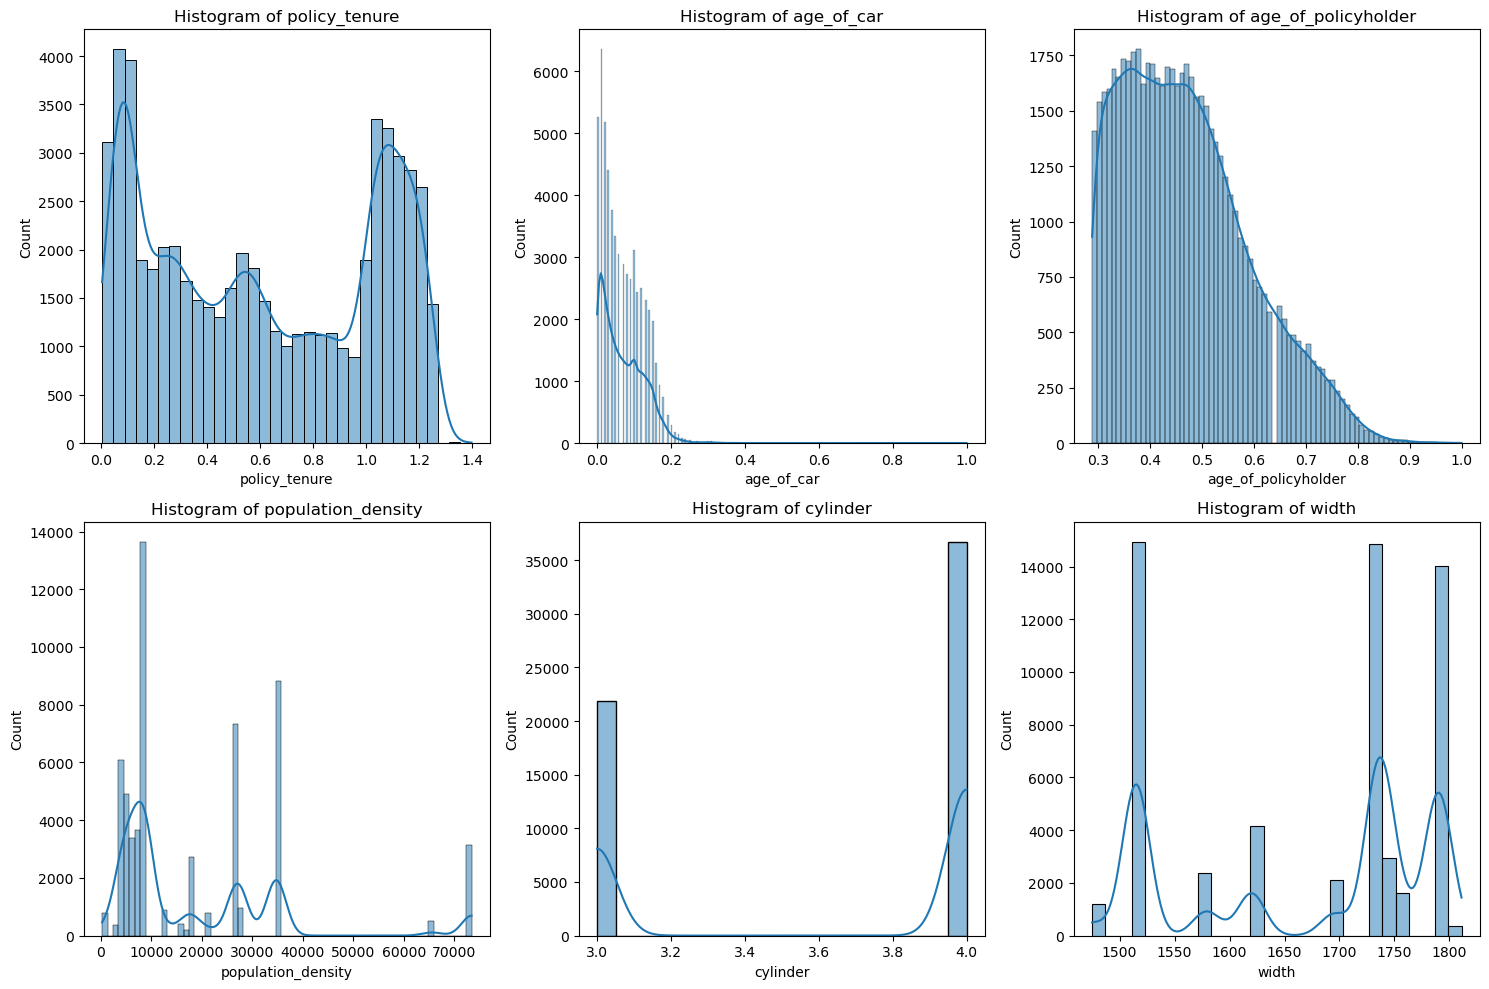

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df[numeric_features_final + ['is_claim']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features_final, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data=numeric_data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

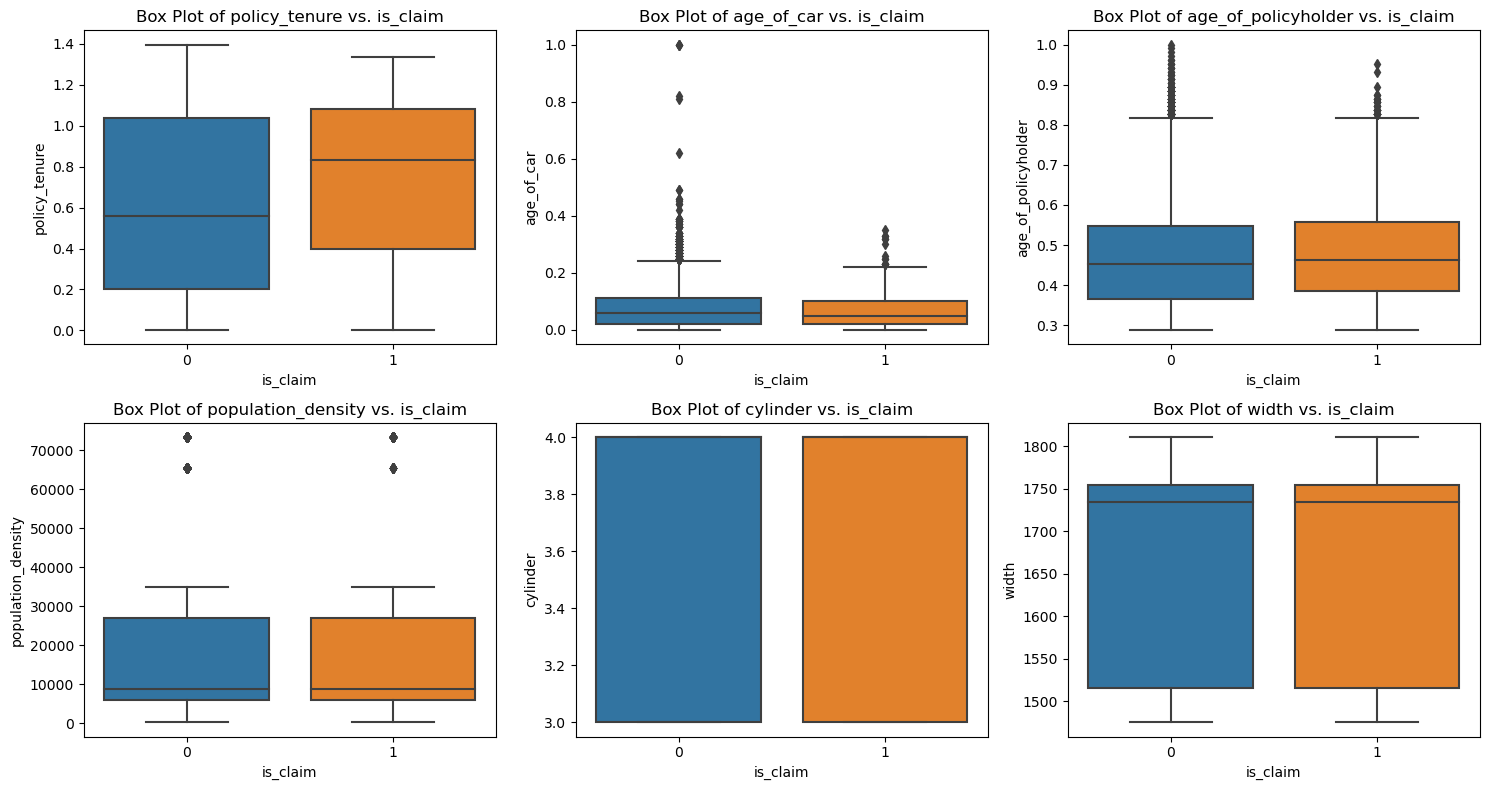

In [13]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features_final, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='is_claim', y=feature)
    plt.title(f'Box Plot of {feature} vs. is_claim')
    plt.xlabel('is_claim')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


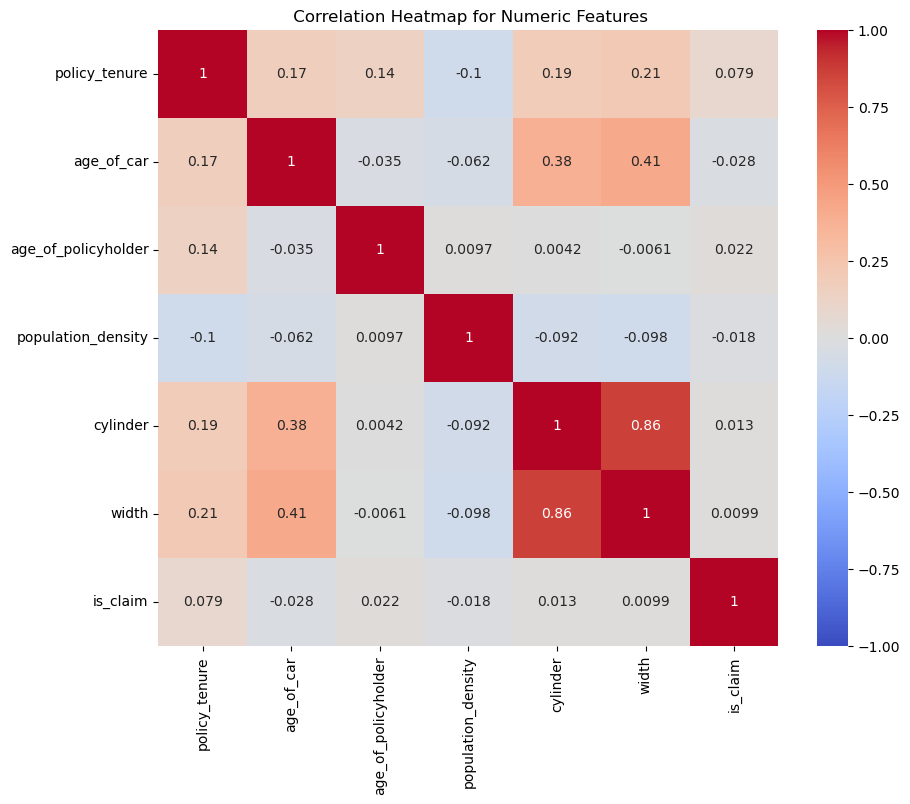

In [14]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(' Correlation Heatmap for Numeric Features')
plt.show()

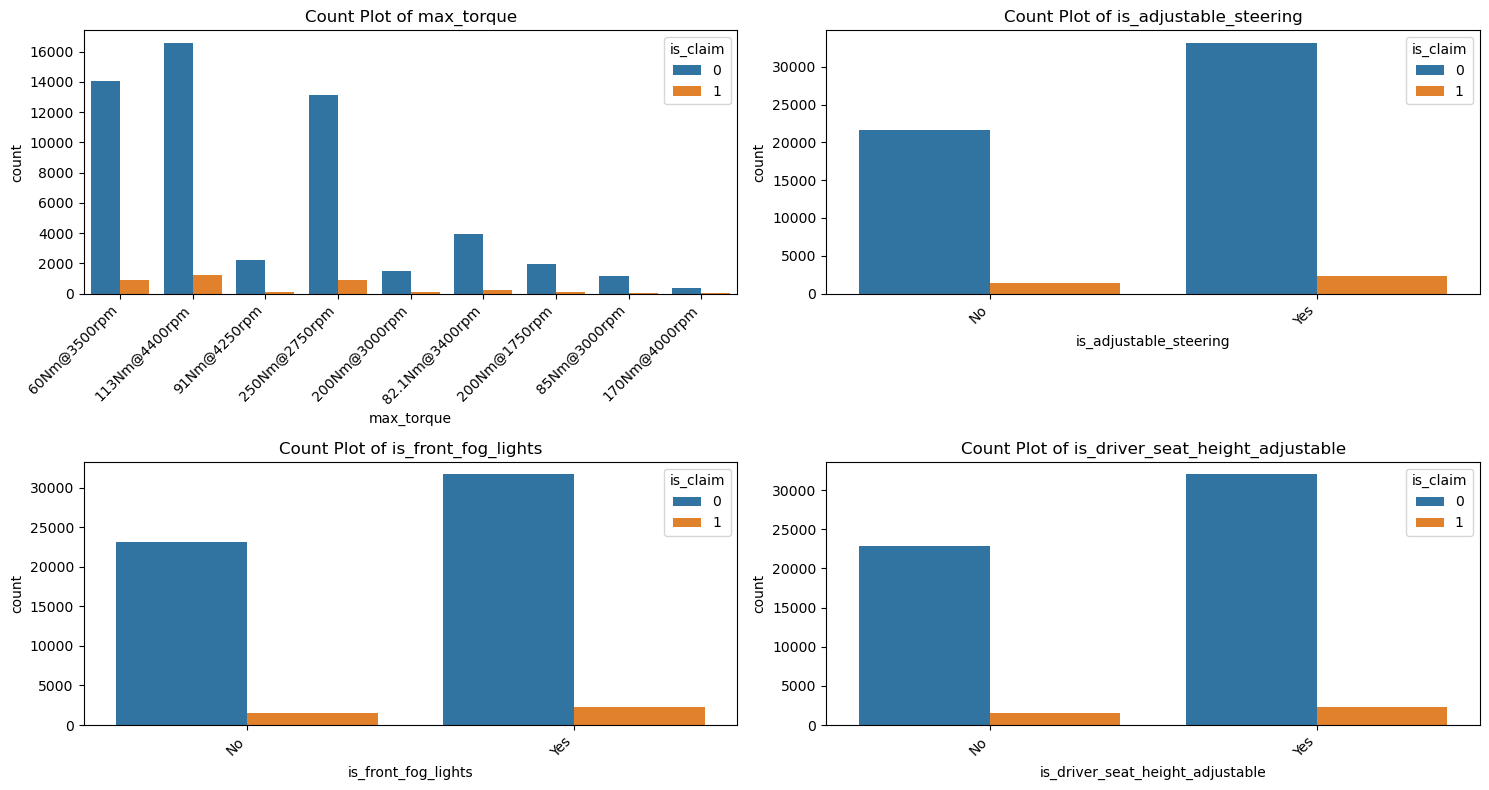

In [15]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features_final, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, hue='is_claim')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature) 
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


In [16]:
for feature in categorical_features_final:
    print(df.groupby([feature, 'is_claim']).size().unstack())
    print('\n' + '-'*40 + '\n')

is_claim            0     1
max_torque                 
113Nm@4400rpm   16576  1220
170Nm@4000rpm     348    15
200Nm@1750rpm    1981   133
200Nm@3000rpm    1482   116
250Nm@2750rpm   13117   901
60Nm@3500rpm    14030   918
82.1Nm@3400rpm   3929   244
85Nm@3000rpm     1136    73
91Nm@4250rpm     2245   128

----------------------------------------

is_claim                    0     1
is_adjustable_steering             
No                      21688  1378
Yes                     33156  2370

----------------------------------------

is_claim                 0     1
is_front_fog_lights             
No                   23170  1494
Yes                  31674  2254

----------------------------------------

is_claim                              0     1
is_driver_seat_height_adjustable             
No                                22822  1479
Yes                               32022  2269

----------------------------------------



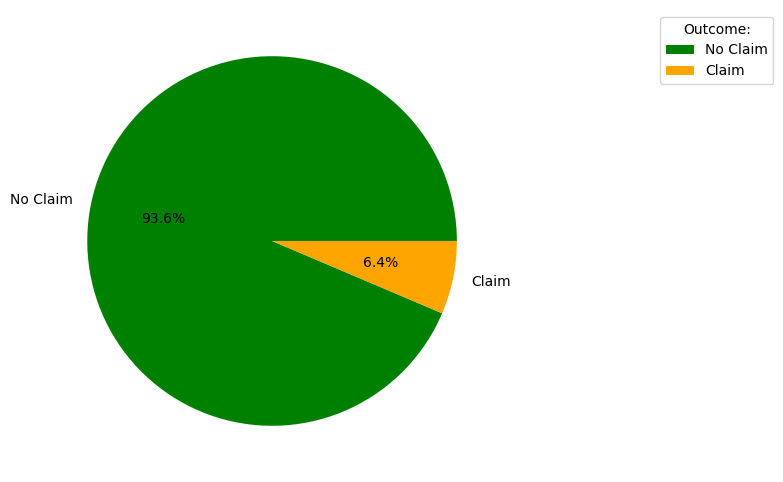

In [17]:
# pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],autopct='%1.1f%%'
        )
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()


In [18]:
print(df.groupby(['is_claim']).size())

is_claim
0    54844
1     3748
dtype: int64


# Data prep for ML model

In [19]:
df_final = df[final_features+['is_claim']]

In [20]:
df_final = df_final.replace({ "No" : 0 , "Yes" : 1 })

In [21]:
df_final = pd.get_dummies(df_final, columns=['max_torque'], prefix='max_torque')

In [22]:
X =df_final.drop('is_claim', axis=1)
y = df_final[['is_claim']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling and undersampling

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

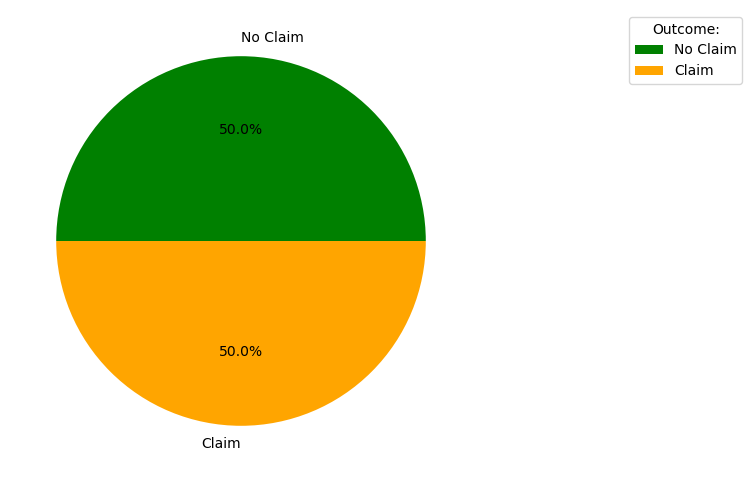

In [25]:
# pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_train_oversampled['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],autopct='%1.1f%%'
        )
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [27]:
len(X_train_undersampled)

5984

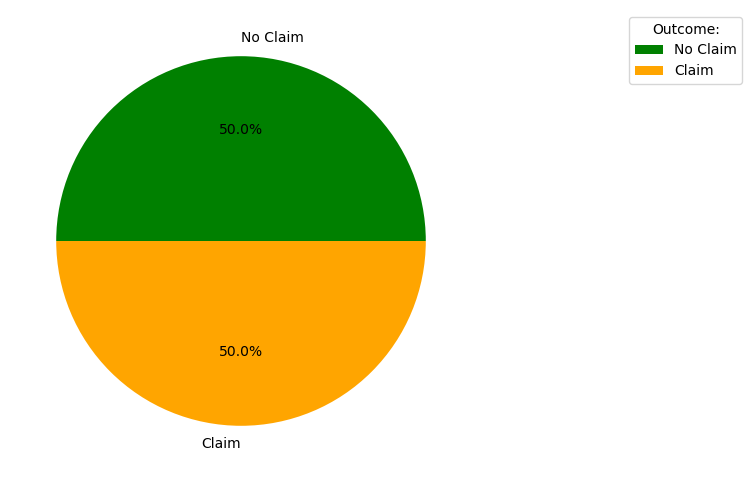

In [28]:
plt.figure(figsize=(6, 6))
plt.pie(y_train_undersampled['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],autopct='%1.1f%%'
        )
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

# Logistic Regression

OVERSAMPLED

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train_oversampled, y_train_oversampled.values.ravel())
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
accuracy

0.5603720453963649

In [31]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6141, 4822],
       [ 330,  426]], dtype=int64)

In [32]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.56
Specificity: 0.56


In [33]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.14
ROC-AUC: 0.56


IMBALANCED

In [34]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [35]:
accuracy

0.9354893762266405

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10963,     0],
       [  756,     0]], dtype=int64)

In [37]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


In [38]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.00
ROC-AUC: 0.50


UNDERSAMPLE

In [39]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train_undersampled, y_train_undersampled.values.ravel())
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [40]:
accuracy

0.5596040617800153

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6123, 4840],
       [ 321,  435]], dtype=int64)

In [42]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.58
Specificity: 0.56


In [43]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.14
ROC-AUC: 0.57


# Random Forest

IMBALANCED

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_value = [1,3,5,7,9]
d_value = [1,2,3,4,5]
error_rates = np.zeros((len(d_value), len(n_value)))
for i, d in enumerate(d_value):
    for j, N in enumerate(n_value):
        clf = RandomForestClassifier(n_estimators=N, max_depth=d, random_state=1)
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates[i, j] = error_rate

In [45]:
error_rates

array([[0.06451062, 0.06451062, 0.06451062, 0.06451062, 0.06451062],
       [0.06451062, 0.06451062, 0.06451062, 0.06451062, 0.06451062],
       [0.06451062, 0.06451062, 0.06451062, 0.06451062, 0.06451062],
       [0.06451062, 0.06451062, 0.06451062, 0.06451062, 0.06451062],
       [0.06468129, 0.06451062, 0.06451062, 0.06451062, 0.06451062]])

In [46]:
clf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=1)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [47]:
accuracy

0.9354893762266405

In [48]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10963,     0],
       [  756,     0]], dtype=int64)

In [49]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


In [50]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.00
ROC-AUC: 0.50


UNDERSAMPLED

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_value = [1,3,5,7,9]
d_value = [1,2,3,4,5]

error_rates = np.zeros((len(d_value), len(n_value)))
for i, d in enumerate(d_value):
    for j, N in enumerate(n_value):
        clf = RandomForestClassifier(n_estimators=N, max_depth=d, random_state=1)
        clf.fit(X_train_undersampled, y_train_undersampled.values.ravel())
        y_pred = clf.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates[i, j] = error_rate

In [52]:
error_rates

array([[0.1375544 , 0.70961686, 0.70543562, 0.63102654, 0.66968171],
       [0.11502688, 0.45276901, 0.45268368, 0.56003072, 0.47862446],
       [0.70253435, 0.46010752, 0.46104616, 0.46317945, 0.46625139],
       [0.4405666 , 0.52402082, 0.48860824, 0.4904002 , 0.48007509],
       [0.58033962, 0.47068863, 0.45251301, 0.48400034, 0.49253349]])

In [53]:
clf = RandomForestClassifier(n_estimators=1, max_depth=2, random_state=1)

clf.fit(X_train_undersampled, y_train_undersampled.values.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [54]:
accuracy

0.8849731205734278

In [55]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10266,   697],
       [  651,   105]], dtype=int64)

In [56]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.14
Specificity: 0.94


In [57]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.13
ROC-AUC: 0.54


OVERSAMPLED

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_value = [1,3,5,7,9]
d_value = [1,2,3,4,5]
error_rates = np.zeros((len(d_value), len(n_value)))
for i, d in enumerate(d_value):
    for j, N in enumerate(n_value):
        clf = RandomForestClassifier(n_estimators=N, max_depth=d, random_state=1)
        clf.fit(X_train_oversampled, y_train_oversampled.values.ravel())
        y_pred = clf.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates[i, j] = error_rate

In [59]:
error_rates

array([[0.79819097, 0.48698694, 0.48510965, 0.48468299, 0.48510965],
       [0.48698694, 0.48698694, 0.48510965, 0.48510965, 0.48374435],
       [0.46881133, 0.46940865, 0.46582473, 0.46625139, 0.46693404],
       [0.4608755 , 0.47546719, 0.45609694, 0.48877891, 0.46027818],
       [0.46420343, 0.46420343, 0.45703558, 0.46480075, 0.45976619]])

In [60]:
clf = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=1)

clf.fit(X_train_oversampled, y_train_oversampled.values.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [61]:
accuracy

0.5439030634013141

In [62]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[5926, 5037],
       [ 308,  448]], dtype=int64)

In [63]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.59
Specificity: 0.54


In [64]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.14
ROC-AUC: 0.57


# SVM

In [65]:
from sklearn import svm
svm_classifier = svm.SVC( kernel ='linear')
svm_classifier.fit(X_train,y_train.values.ravel())
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [66]:
accuracy

0.9245669425718918

In [67]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10826,   137],
       [  747,     9]], dtype=int64)

In [68]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.01
Specificity: 0.99


In [69]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.02
ROC-AUC: 0.50


UNDERSAMPLED

In [70]:
from sklearn import svm
svm_classifier = svm.SVC( kernel ='linear')
svm_classifier.fit(X_train_undersampled,y_train_undersampled.values.ravel())
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [71]:
accuracy

0.5142930284153938

In [72]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[5682, 5281],
       [ 411,  345]], dtype=int64)

In [73]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.46
Specificity: 0.52


In [74]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.11
ROC-AUC: 0.49


OVERSAMPLED

In [75]:
from sklearn import svm
svm_classifier = svm.SVC( kernel ='linear')
svm_classifier.fit(X_train_oversampled,y_train_oversampled.values.ravel())
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [76]:
accuracy

0.4438091987370936

In [77]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[4789, 6174],
       [ 344,  412]], dtype=int64)

In [78]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.54
Specificity: 0.44


In [79]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.11
ROC-AUC: 0.49


# XGBOOST

IMBALANCED

In [80]:
#pip install xgboost


In [81]:
import xgboost as xgb

In [82]:
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
num_round = 100  # You can adjust the number of boosting rounds
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [83]:
accuracy

0.9354893762266405

In [84]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10963,     0],
       [  756,     0]], dtype=int64)

In [85]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 1.00


In [86]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.00
ROC-AUC: 0.50


OVERSAMPLED

In [87]:
dtrain = xgb.DMatrix(X_train_oversampled, label=y_train_oversampled)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
num_round = 100  # You can adjust the number of boosting rounds
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [88]:
accuracy

0.8625309326734363

In [89]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[9985,  978],
       [ 633,  123]], dtype=int64)

In [90]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.16
Specificity: 0.91


In [91]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.13
ROC-AUC: 0.54


UNDERSAMPLED

In [92]:
dtrain = xgb.DMatrix(X_train_undersampled, label=y_train_undersampled)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
num_round = 100  # You can adjust the number of boosting rounds
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [93]:
accuracy

0.5524362146940865

In [94]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[5955, 5008],
       [ 237,  519]], dtype=int64)

In [95]:
true_positives = conf_matrix[1][1]
false_negatives = conf_matrix[1][0]
sensitivity = true_positives / (true_positives + false_negatives)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.69
Specificity: 0.54


In [96]:
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

F1-Score: 0.17
ROC-AUC: 0.61
